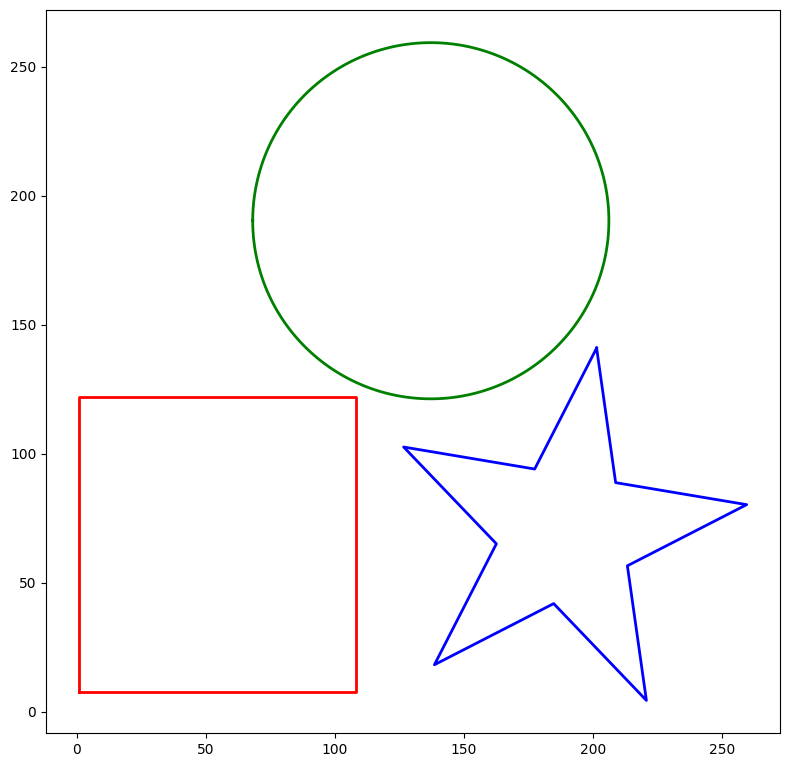

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV file and parse polyline data
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot original shapes
def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Main function to execute the algorithm
def main():
    csv_path = './problems/problems/isolated_sol.csv'  # Update with actual CSV file path
    path_XYs = read_csv(csv_path)
    plot(path_XYs)

if __name__ == "__main__":
    main()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs
def detect_shape(contour):
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    vertices = len(approx)
    
    if vertices == 3:
        return "Triangle"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        if 0.95 <= aspect_ratio <= 1.05:
            return "Square"
        else:
            return "Rectangle"
    elif vertices == 5:
        return "Pentagon"
    elif vertices == 10:
        return "Star"
    else:
        area = cv2.contourArea(contour)
        (x, y), radius = cv2.minEnclosingCircle(contour)
        circle_area = np.pi * (radius ** 2)
        if 0.9 <= area / circle_area <= 1.1:
            return "Circle"
        else:
            return "Polygon"

def count_lines_of_symmetry(XYs):
    img = np.zeros((512, 512), dtype=np.uint8)
    
    for XY in XYs:
        XY = np.array(XY)
        pts = XY.reshape((-1, 1, 2)).astype(np.int32)
        cv2.polylines(img, [pts], isClosed=True, color=255, thickness=2)
    
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        shape = detect_shape(contour)
        if shape == "Circle":
            print("Circle detected: Infinite lines of symmetry")
        elif shape == "Rectangle":
            print("Rectangle detected: 2 lines of symmetry")
        elif shape == "Star":
            print("Star detected: 5 lines of symmetry")
        else:
            print(f"{shape} detected: Symmetry not determined")

def main():
    csv_path = './problems/problems/isolated_sol.csv'
    path_XYs = read_csv(csv_path)
    count_lines_of_symmetry(path_XYs)

if __name__ == "__main__":
    main()


Circle detected: Infinite lines of symmetry
Rectangle detected: 2 lines of symmetry
Star detected: 5 lines of symmetry
